# Deteccion de numeros a partir de un grupo de pixeles de dimencion 20x30 

### Importacion de las librerias

In [1]:
from sklearn.neural_network import MLPClassifier
import pandas as pandas
import numpy as np
import graficar as graf
import GenerateResData as gen
import RedNeuronal as rd

### Se lee el archivo exel 
 - Se declara un arreglo vacio `data` donde se guardan los data frame de cada libro de exel.
 - Se declara el arreglo `libros` donde se guardan los nombres de todos los libros del archivo exel.

In [2]:
data = []
libros = ["Grupo1", "Grupo2", "Grupo3", "Grupo4", "Grupo5"]

### Organizacion de datos
 - Se declara la lista `resdata`, donde se guardan todos los datos divididos por columnas.
 - Se declara la lista `alldata`, apartir de resdata se divide a todos los datos en filas.

In [3]:
resdata = []
alldata = []

### Se guardan los datos en `resdata`

In [4]:
for g in libros:
    i = 0
    dt = pandas.read_excel('datasetNumeros.xls', g, header=None)
    dt.replace(np.nan, 0.0, inplace=True)
    dt.replace(-1, 0.0, inplace=True)
    while i <= 209:
        resdata.append(dt.loc[:, i:i+19])
        i=i+21

### Se guardan los datos en alldata

In [5]:
for i, value in enumerate(resdata):
    j = 0
    while j <= 309:
        temdt = value.loc[j:j+29, :]
        alldata.append(np.reshape(temdt.values, [600]))
        j += 31
del resdata
del data

### Graficar los datos
 - Se grafica el dato que decee ingrese el indice del dato `0<=index<=500`, (`graficar(), graficar(data)`).

 - SSe grafica los valores de 100 en 100 datos `0<=index<=5`, (`graficarGrupo100()`).

In [6]:
graf.graficarGrupo100(alldata, 1)

In [7]:
graf.graficarGrupo100(alldata, 2)

In [8]:
graf.graficarGrupo100(alldata, 3)

In [9]:
graf.graficarGrupo100(alldata, 4)

In [10]:
graf.graficarGrupo100(alldata, 5)

### Creamos los valores `Y` de entrenamiento

In [11]:
alldataY = gen.generateYData()

### Se crea una red `MLPClassifier` y se la entrena

### Tambien se crea el modelo de la red neuronal creada en clase `RedNeuronal` y se lo entrena

In [12]:
capas = [500, 400, 300, 200, 100, 50]
model = MLPClassifier(hidden_layer_sizes=capas, max_iter=1000000)
model1 = rd.RedNeuronal(1000, 0.001)

In [13]:
model.fit(np.array(alldata), np.array(alldataY))

MLPClassifier(hidden_layer_sizes=[500, 400, 300, 200, 100, 50],
              max_iter=1000000)

In [14]:
model1.train(np.array(alldata), np.array(alldataY))

### Se leen los datos para realizar las predicciones

In [15]:
pdt = pandas.read_excel('datasetNumeros.xls', 'DatosPrueba', header=None)
pdt.replace(np.nan, 0.0, inplace=True)
pdt.replace(-1, 0.0, inplace=True)
respdt = []
allpdt = []
i = 0 
while i <= 209:
    respdt.append(pdt.loc[:, i:i+19])
    i=i+21
del i
for i, value in enumerate(respdt):
    j = 0
    while j <= 123:
        temdt = value.loc[j:j+29, :]
        allpdt.append(np.reshape(temdt.values, [600]))
        j += 31
del pdt
del respdt

### Mostrar datos de prueba

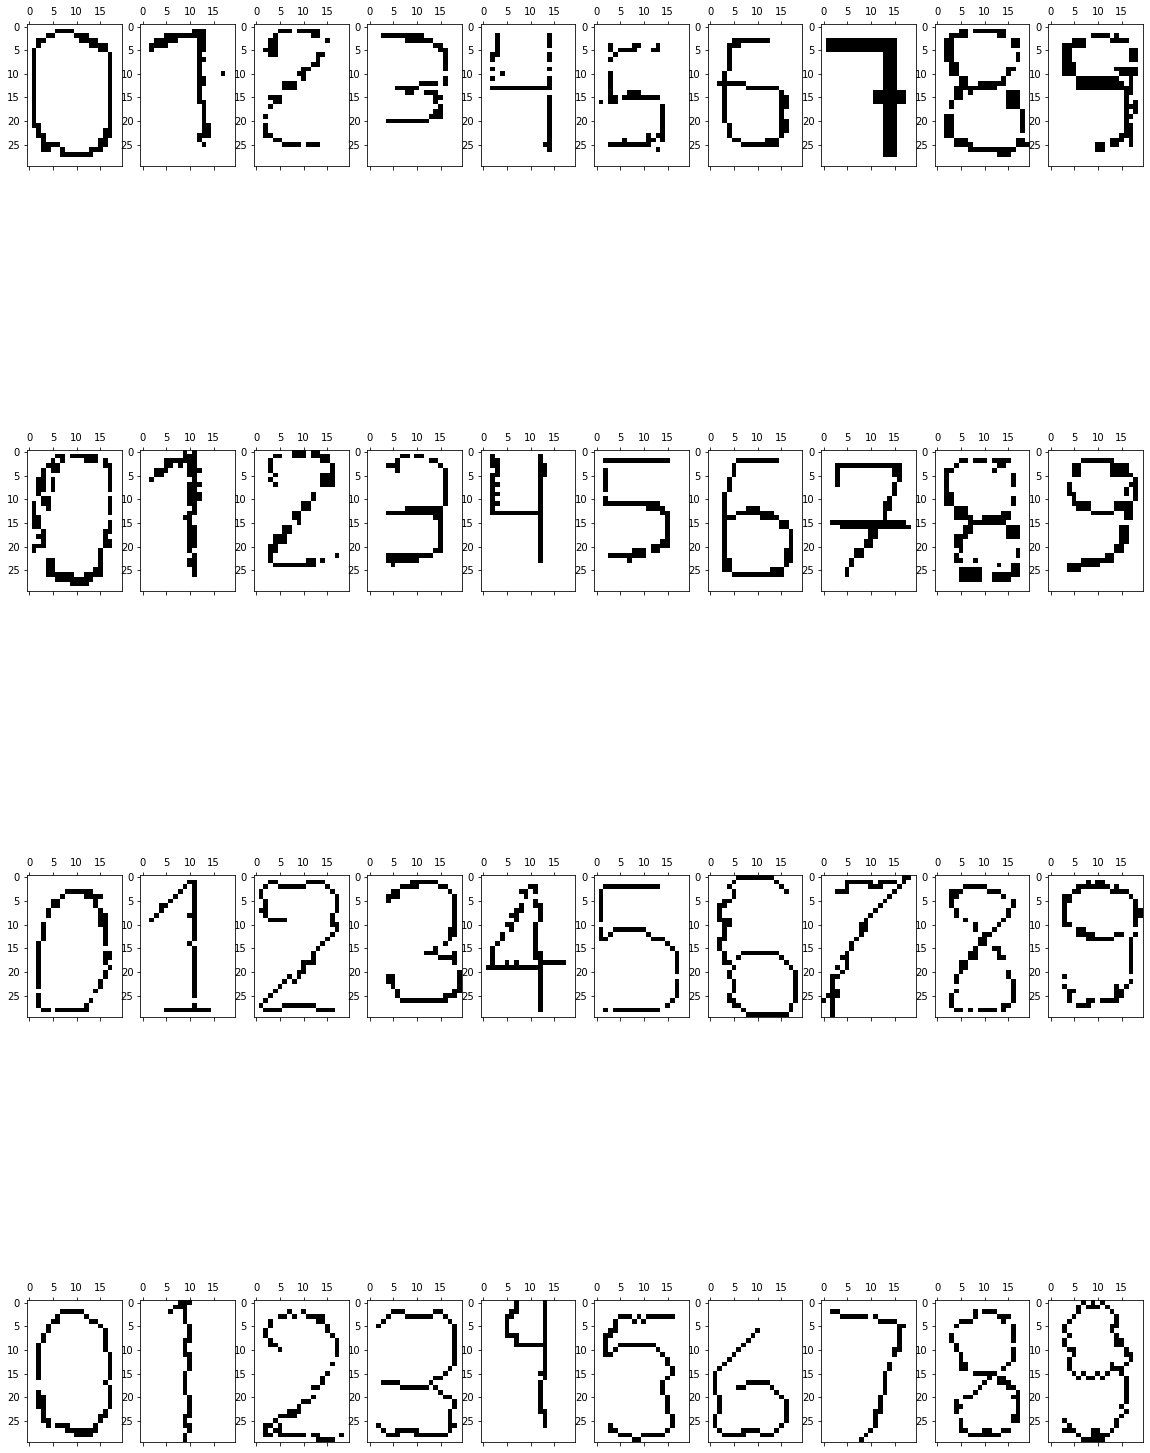

In [17]:
graf.graficarPredData(allpdt)

### Se predice y se grafica el numero ingresado y se define un titulo con la prediccion.

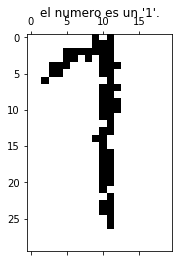

In [18]:
#model.predict([alldata[100]])
#model.predict_proba([alldata[100]])
pred = model.predict([allpdt[5]])[0].tolist()
gen.predictGrafData(allpdt[5], pred)
del pred

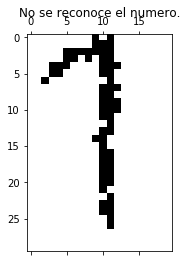

In [22]:
pred = model1.predict([allpdt[5]])[0].tolist()
gen.predictGrafData(allpdt[5], pred)

### Se compara errores de los dos modelos

#### Error de `MLPClassifier`

In [20]:
model.epsilon

1e-08

#### Error de `RedNeuronal`

In [21]:
model1.err

1.5394771748509877e-05